<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Hybrid%20MNB-DNN%20for%205%20class%20classifications%20based%20on%20WSN-DS%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Hybrid MNB-DNN for 5 class classifications based on WSN-DS dataset**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# load dataset
dataset = pd.read_csv("dataset_WSN-DS.csv")
dataset.isnull().sum()

 id                 0
 Time               0
 Is_CH              0
 who CH             0
 Dist_To_CH         0
 ADV_S              0
 ADV_R              0
 JOIN_S             0
 JOIN_R             0
 SCH_S              0
 SCH_R              0
Rank                0
 DATA_S             0
 DATA_R             0
 Data_Sent_To_BS    0
 dist_CH_To_BS      0
 send_code          0
Expaned Energy      0
Class               0
dtype: int64

In [3]:
dataset.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

In [5]:
# Data preprocessing
encoder = LabelEncoder()
y = encoder.fit_transform(dataset['Class'])
y = np_utils.to_categorical(y, num_classes=5)
X = dataset.drop(['Class'],axis=1)
X=X.values
print(X.shape)
print(y.shape)

(374661, 18)
(374661, 5)


In [6]:
# Data preprocessing
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### **Hybrid MNB-DNN for 5 class classifications**

In [10]:
# Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, np.argmax(y_train, axis=1))

y_pred_mnb = mnb.predict(X_test)
y_pred_mnb = np_utils.to_categorical(y_pred_mnb, num_classes=5)

from sklearn.metrics import accuracy_score

# Calculate accuracy for Multinomial Naive Bayes model
accuracy_mnb = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred_mnb, axis=1))
print("Multinomial Naive Bayes Accuracy:", accuracy_mnb)

Multinomial Naive Bayes Accuracy: 0.6477389683179148


In [11]:
# DNN model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Evaluate DNN model
_, accuracy_dnn = model.evaluate(X_test, y_test, verbose=0)
print("DNN Accuracy:", accuracy_dnn)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1216      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 1,541
Trainable params: 1,541
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
21255/21255 [==============================] - 49s 2ms/step - loss: 951.5510 - accuracy: 0.6804 - val_loss: 0.7318 - val_accuracy: 0.8302
Epoch 2/15
21255/21255 [==============================] - 46s 2ms/step - loss: 4.2515 - accuracy: 0.7421 - val_loss: 50.8143 - val_accuracy: 0.4902
Epoch 3/15
21255/2125

In [12]:
# Combine MNB and DNN predictions
combined_pred = (y_pred_mnb + model.predict(X_test)) / 2
y_pred_combined = np.argmax(combined_pred, axis=1)

# Evaluate the combined model
combined_report = classification_report(np.argmax(y_test, axis=1), y_pred_combined)
print("Combined Model Classification Report:")
print(combined_report)

10628/10628 [==============================] - 13s 1ms/step
Combined Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87     67745
           1       0.39      0.44      0.42     68144
           2       0.98      0.35      0.51     68282
           3       0.58      0.82      0.68     68009
           4       0.66      0.82      0.73     67886

    accuracy                           0.65    340066
   macro avg       0.71      0.65      0.64    340066
weighted avg       0.71      0.65      0.64    340066



In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='YlGnBu')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Blackhole','Flooding','Grayhole','TDMA'])
  ax.yaxis.set_ticklabels(['Normal','Blackhole','Flooding','Grayhole','TDMA'])
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of Hybrid MNB-DNN Model


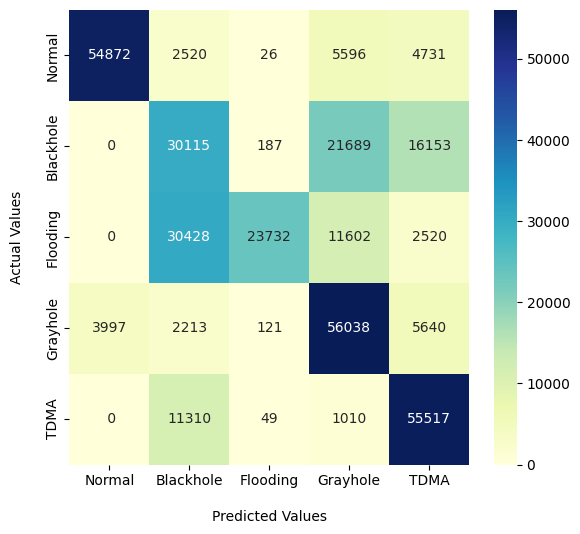

In [14]:
print("Confusion Matrix of Hybrid MNB-DNN Model") 
conf_mat(np.argmax(y_test, axis=1), y_pred_combined)